In [177]:
# https://xcitech.github.io/tutorials/heroku_tutorial/
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [184]:
# Data source is '2015_CBQ_I.csv' from NHANES 'GrocerySpending' folder
# Columns originally named with question code (Example: CDB071)
# Columns renamed with descriptive question ID (Example: Grocery)
df = pd.read_csv('2015_GrocerySpend.csv', encoding='latin-1')

In [185]:
df.columns

Index(['SEQN', 'Grocery', 'Nonfood', 'Other', 'EatOut', 'Delivery'], dtype='object')

In [186]:
df.head()

,SEQN,Grocery,Nonfood,Other,EatOut,Delivery
0,83732,300.0,3.000000e+01,5.400000e-79,1.250000e+02,5.400000e-79
1,83733,200.0,5.400000e-79,5.000000e+01,4.000000e+01,5.400000e-79
2,83734,400.0,8.000000e+01,5.400000e-79,5.400000e-79,5.400000e-79
3,83735,300.0,1.000000e+02,2.500000e+02,5.000000e+01,5.400000e-79
4,83736,300.0,5.400000e-79,5.400000e-79,2.000000e+02,5.400000e-79


In [187]:
df.dtypes

SEQN          int64
Grocery     float64
Nonfood     float64
Other       float64
EatOut      float64
Delivery    float64
dtype: object

In [192]:
# Drop empty values and convert data to integer
df = df.dropna(how='any').astype(int)
df.head()

,Grocery,Nonfood,Other,EatOut,Delivery
0,300,30,0,125,0
1,200,0,50,40,0
2,400,80,0,0,0
3,300,100,250,50,0
4,300,0,0,200,0


In [193]:
df = df.drop(columns='SEQN')
df.head()

KeyError: "['SEQN'] not found in axis"

In [195]:
# Limit data to Max value identified on documentation as valid data.
# 777777 = Refused to answer
# 999999 = Don't know
df = df[df.Grocery <= 4000][df.Nonfood <= 1500][df.Other <= 2000][df.EatOut <= 2000][df.Delivery <= 1000]

In [196]:
df.describe()

,Grocery,Nonfood,Other,EatOut,Delivery
count,9172.000000,9172.000000,9172.000000,9172.000000,9172.000000
mean,466.801679,37.900131,142.780855,151.720454,30.895225
std,335.668748,77.160946,195.148737,174.339681,58.332542
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.000000,0.000000,0.000000,40.000000,0.000000
50%,400.000000,0.000000,85.000000,100.000000,0.000000
75%,600.000000,50.000000,200.000000,200.000000,50.000000
max,3560.000000,1285.000000,1560.000000,2000.000000,857.000000


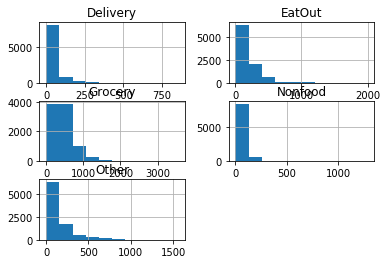

In [198]:
# Show sample histogram distribution of data
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
df.hist()
plt.show()

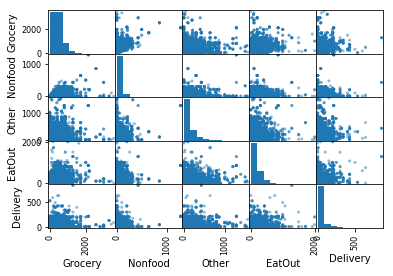

In [199]:
# Show matrix of scatter plot data for quick overview
scatter_matrix(df)
plt.show()

In [201]:
# Assign Grocery and Other to X and y
# ??? Reshape?
X = df.Grocery.values.reshape(-1, 1)
y = df.Other.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (9172, 1) (9172, 1)


array([[ 300],
       [ 200],
       [ 400],
       ...,
       [ 731],
       [1000],
       [ 300]])

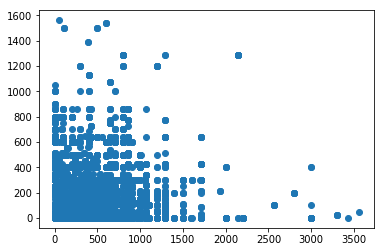

In [202]:
# Plot Grocery and Other as scatterplot
plt.scatter(X, y)
# Data shows negative correlation b/c as people spend more on Grocery, they spend less on food at Other stores.

In [204]:
# ???
# Example from Monica's search
# https://xcitech.github.io/tutorials/heroku_tutorial/
df = pd.concat([df,pd.get_dummies(df['Grocery'],drop_first=True,prefix='Grocery')],axis=1)
df = pd.concat([df,pd.get_dummies(df['Other'],drop_first=True,prefix='Other')],axis=1)

In [205]:
# https://xcitech.github.io/tutorials/heroku_tutorial/

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Grocery',axis=1),df['Other'], test_size=0.30)

from sklearn.linear_model import LogisticRegression
#Train the model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

#Predicting on the Test Set
predictions = logmodel.predict(X_test)



In [206]:
predictions
# What is this predicting?

array([250,  70, 400, ..., 200,  40, 100])

In [207]:
# from Class Activities
# Create linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [208]:
# fit model
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [209]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 38048.766045660916
R-squared (R2 ): 0.0007907683958884304


In [210]:
# Overall Score for the model
model.score(X, y)

0.0007907683958884303

In [213]:
m = model.coef_
b = model.intercept_

print('Weight coefficients: ', m)
print('y-axis intercept: ', b) 

Weight coefficients:  [[0.01634856]]
y-axis intercept:  [135.14931982]


In [214]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [0]
Predicted output: [140.05388763]
Prediction Error: [140.05388763]


In [215]:
# pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

In [216]:
x_min = X.min()
x_max = X.max()

In [217]:
y_min_actual = y.min()
y_max_actual = y.max()

In [218]:
y_min = m * x_min + b
y_max = m * x_max + b
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 0
Calculated Min Value: [[135.14931982]]
Actual Max Value: 1560
Calculated Max Value: [[193.35019113]]


In [219]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

IndexError: invalid index to scalar variable.

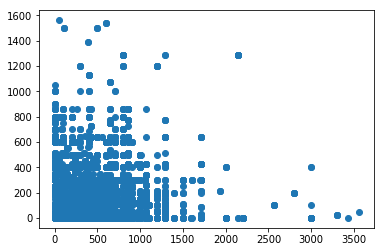

In [164]:
# https://metaphor.ethz.ch/fsdb/sam/PythonTutorial/frequent_errors.html
# import numpy as np
# plt.plot(X.numpy(), y.numpy())
plt.scatter(X, y)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

# 2019-08-09
# IndexError: invalid index to scalar variable.
# Not showing regression line